**Statistical Pattern Recognition Research Project**


```
Title: A Comparative Analysis of Logistic Regression,
Random Forest and KNN Models for the Text Classification
```
[paper](https://link.springer.com/article/10.1007/s41133-020-00032-0)

Group Number 5:

*   Amirhassan Amirmahani
*   Reyhaneh Keshavarzpour 




#Preprocessing

##Fetch Dataset

In [1]:
!gdown --id 1eqPWW_VfKveBXdZauapLXhj1qLpD0jm7

Downloading...
From: https://drive.google.com/uc?id=1eqPWW_VfKveBXdZauapLXhj1qLpD0jm7
To: /content/bbc-dataset.zip
100% 2.51M/2.51M [00:00<00:00, 132MB/s]


In [2]:
!unzip /content/bbc-dataset.zip

Archive:  /content/bbc-dataset.zip
  inflating: BBC News Sample Solution.csv  
  inflating: BBC News Test.csv       
  inflating: BBC News Train.csv      
  inflating: 780a281dcace4f7386a051c5c75232ea.pdf  


##Import packages

In [3]:
import re
import nltk
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

##Load dataset

In [5]:
def load(path,need_join=False):
  print(f"Load file: {path}")
  # Read data frame
  df = pd.read_csv(path)
  if(need_join):
    all_df=pd.read_csv('/content/BBC News Sample Solution.csv')
    df=df.join(all_df.set_index('ArticleId'),on='ArticleId')
  display(df)

  # Description of the dataset
  print('SHAPE OF DATASET: ', df.shape, '\n\nCOLUMNS IN DATASET: ', df.columns, '\n\nCATEGORIES: ', df.Category.unique(), '\n\n')
  return df

In [6]:
train_df=load('/content/BBC News Train.csv')
test_df=load('/content/BBC News Test.csv',True)
all_data=train_df.append(test_df, ignore_index=True)
display(all_data)


Load file: /content/BBC News Train.csv


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


SHAPE OF DATASET:  (1490, 3) 

COLUMNS IN DATASET:  Index(['ArticleId', 'Text', 'Category'], dtype='object') 

CATEGORIES:  ['business' 'tech' 'politics' 'sport' 'entertainment'] 


Load file: /content/BBC News Test.csv


,ArticleId,Text,Category
0,1018,qpr keeper day heads for preston queens park r...,sport
1,1319,software watching while you work software that...,tech
2,1138,d arcy injury adds to ireland woe gordon d arc...,business
3,459,india s reliance family feud heats up the ongo...,entertainment
4,1020,boro suffer morrison injury blow middlesbrough...,politics
...,...,...,...
730,1923,eu to probe alitalia state aid the european ...,sport
731,373,u2 to play at grammy awards show irish rock ba...,tech
732,1704,sport betting rules in spotlight a group of mp...,business
733,206,alfa romeos to get gm engines fiat is to sto...,entertainment


SHAPE OF DATASET:  (735, 3) 

COLUMNS IN DATASET:  Index(['ArticleId', 'Text', 'Category'], dtype='object') 

CATEGORIES:  ['sport' 'tech' 'business' 'entertainment' 'politics'] 




,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
2220,1923,eu to probe alitalia state aid the european ...,sport
2221,373,u2 to play at grammy awards show irish rock ba...,tech
2222,1704,sport betting rules in spotlight a group of mp...,business
2223,206,alfa romeos to get gm engines fiat is to sto...,entertainment


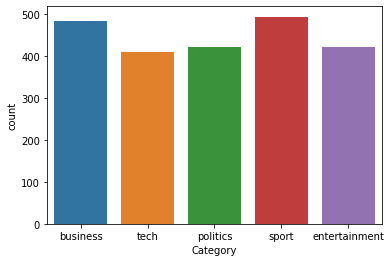

In [7]:
sns.countplot(all_data['Category'])

##Normalize

In [8]:
def normalize(all_data):
  # DATA CLEANING
  print('Data cleaning in progress\n.\n..\n...')
  #Tf-idf
  #make all test lowercase
  #normalize with norm l2
  #removes stop_words
  #uses unigram
  tf_idf=TfidfVectorizer(stop_words="english",norm='l2',lowercase=True,ngram_range=(1, 1))
  #PorterStemmer
  ps=PorterStemmer()
  #LabelEncoder toEncode label categories to numbers
  enc = LabelEncoder()
  all_data["Cleaned"]=all_data['Text'].copy()
  all_data["Cleaned"]=all_data["Cleaned"].apply(lambda x:' '.join([ps.stem(item) for item in x.split(' ')]))
  display(all_data)
  #Split 75-25
  X_train, X_test, y_train, y_test=train_test_split(all_data['Text'],all_data['Category'], test_size=0.25)
  
  Y_train = enc.fit_transform(y_train)
  print(list(enc.classes_))
  X_train=[ps.stem(item) for item in X_train]
  X_train_vec=tf_idf.fit_transform(X_train)

  Y_test = enc.transform(y_test)
  X_test=[ps.stem(item) for item in X_test]
  X_test_vec=tf_idf.transform(X_test)


  return X_train_vec,Y_train,X_test_vec,Y_test

In [9]:
# X_train_vec,Y_train,X_test_vec,Y_test=normalize(X_train, X_test, y_train, y_test)
X_train_vec,Y_train,X_test_vec,Y_test=normalize(all_data)
# print(X_train_vec)
# print(Y_train)
# print(X_test_vec)
# print(Y_test)

Data cleaning in progress
.
..
...


,ArticleId,Text,Category,Cleaned
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex-boss launch defenc lawyer defend f...
1,154,german business confidence slides german busin...,business,german busi confid slide german busi confid fe...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indic econom gloom citizen in a major...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyl govern mobil choic faster better o...
4,917,enron bosses in $168m payout eighteen former e...,business,enron boss in $168m payout eighteen former enr...
...,...,...,...,...
2220,1923,eu to probe alitalia state aid the european ...,sport,eu to probe alitalia state aid the european ...
2221,373,u2 to play at grammy awards show irish rock ba...,tech,u2 to play at grammi award show irish rock ban...
2222,1704,sport betting rules in spotlight a group of mp...,business,sport bet rule in spotlight a group of mp and ...
2223,206,alfa romeos to get gm engines fiat is to sto...,entertainment,alfa romeo to get gm engin fiat is to stop m...


['business', 'entertainment', 'politics', 'sport', 'tech']


# **Logistic regression**

In [10]:
def report(Y_test, y_pred_test):
  tmp=classification_report(Y_test, y_pred_test,output_dict=True)
  tmp_keys,tmp_values=tmp.keys(),list(tmp.values())
  # print(tmp_values)
  res_dict={}
  res_dict['Business']=tmp_values[0]
  res_dict['Entertainment']=tmp_values[1]
  res_dict['Politics']=tmp_values[2]
  res_dict['Sport']=tmp_values[3]
  res_dict['Tech']=tmp_values[4]
  return res_dict

              precision    recall  f1-score   support

           0       0.66      0.74      0.70       121
           1       0.77      0.67      0.72       102
           2       0.65      0.65      0.65        98
           3       0.73      0.77      0.75       132
           4       0.74      0.68      0.71       104

    accuracy                           0.71       557
   macro avg       0.71      0.70      0.70       557
weighted avg       0.71      0.71      0.71       557



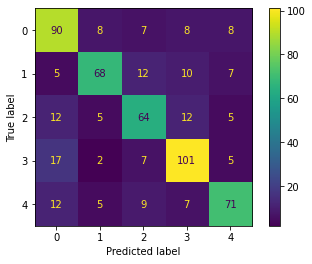

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

logmodel = LogisticRegression()
logmodel.fit(X_train_vec,Y_train)

predictions = logmodel.predict(X_test_vec)

print(classification_report(Y_test,predictions))
cm = confusion_matrix(Y_test, predictions, labels=logmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logmodel.classes_)
disp.plot()
plt.show()

In [12]:
lr_dict=report(Y_test, predictions)
print(lr_dict)

{'Business': {'precision': 0.6617647058823529, 'recall': 0.743801652892562, 'f1-score': 0.7003891050583657, 'support': 121}, 'Entertainment': {'precision': 0.7727272727272727, 'recall': 0.6666666666666666, 'f1-score': 0.7157894736842105, 'support': 102}, 'Politics': {'precision': 0.6464646464646465, 'recall': 0.6530612244897959, 'f1-score': 0.649746192893401, 'support': 98}, 'Sport': {'precision': 0.7318840579710145, 'recall': 0.7651515151515151, 'f1-score': 0.7481481481481481, 'support': 132}, 'Tech': {'precision': 0.7395833333333334, 'recall': 0.6826923076923077, 'f1-score': 0.7100000000000002, 'support': 104}}


# **Random Forest**

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       121
           1       0.76      0.64      0.70       102
           2       0.64      0.66      0.65        98
           3       0.70      0.76      0.73       132
           4       0.74      0.66      0.70       104

    accuracy                           0.70       557
   macro avg       0.70      0.69      0.70       557
weighted avg       0.70      0.70      0.70       557



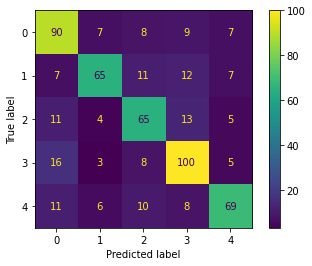

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
forest = RandomForestClassifier()
forest.fit(X_train_vec, Y_train)
y_pred_test = forest.predict(X_test_vec)
accuracy_score(Y_test, y_pred_test)
confusion_matrix(Y_test, y_pred_test)
print(classification_report(Y_test, y_pred_test))
cm = confusion_matrix(Y_test, y_pred_test, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=forest.classes_)
disp.plot()
plt.show()

In [14]:
rf_dict=report(Y_test, y_pred_test)
print(rf_dict)

{'Business': {'precision': 0.6666666666666666, 'recall': 0.743801652892562, 'f1-score': 0.7031249999999999, 'support': 121}, 'Entertainment': {'precision': 0.7647058823529411, 'recall': 0.6372549019607843, 'f1-score': 0.6951871657754011, 'support': 102}, 'Politics': {'precision': 0.6372549019607843, 'recall': 0.6632653061224489, 'f1-score': 0.6499999999999999, 'support': 98}, 'Sport': {'precision': 0.704225352112676, 'recall': 0.7575757575757576, 'f1-score': 0.7299270072992701, 'support': 132}, 'Tech': {'precision': 0.7419354838709677, 'recall': 0.6634615384615384, 'f1-score': 0.7005076142131978, 'support': 104}}


# ***KNN***

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       121
           1       0.78      0.65      0.71       102
           2       0.64      0.66      0.65        98
           3       0.73      0.77      0.75       132
           4       0.70      0.67      0.69       104

    accuracy                           0.70       557
   macro avg       0.70      0.70      0.70       557
weighted avg       0.70      0.70      0.70       557



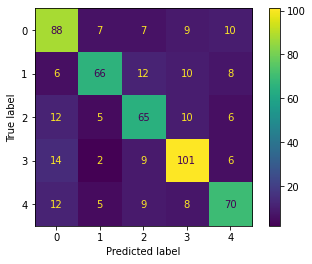

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=20)
 
knn.fit(X_train_vec, Y_train)
 
# Predict on dataset which model has not seen before
pred = knn.predict(X_test_vec)
print(classification_report(Y_test,pred))
cm = confusion_matrix(Y_test, pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

In [16]:
knn_dict=report(Y_test, pred)
print(knn_dict)

{'Business': {'precision': 0.6666666666666666, 'recall': 0.7272727272727273, 'f1-score': 0.6956521739130435, 'support': 121}, 'Entertainment': {'precision': 0.7764705882352941, 'recall': 0.6470588235294118, 'f1-score': 0.7058823529411765, 'support': 102}, 'Politics': {'precision': 0.6372549019607843, 'recall': 0.6632653061224489, 'f1-score': 0.6499999999999999, 'support': 98}, 'Sport': {'precision': 0.7318840579710145, 'recall': 0.7651515151515151, 'f1-score': 0.7481481481481481, 'support': 132}, 'Tech': {'precision': 0.7, 'recall': 0.6730769230769231, 'f1-score': 0.6862745098039216, 'support': 104}}


#Result analyze

In [18]:
import numpy as np
import matplotlib.pyplot as plt
def plot_data(key):
  rf_list=[rf_dict[item][key] for item in list(rf_dict.keys())]
  lr_list=[lr_dict[item][key] for item in list(lr_dict.keys())]
  knn_list=[knn_dict[item][key] for item in list(knn_dict.keys())]
  # data
  rf_dic = {'Business':rf_list[0], 'Entertainment':rf_list[1], 'Politics':rf_list[2], 'Sport':rf_list[3], 'Tech': rf_list[4]}
  lr_dic = {'Business':lr_list[0], 'Entertainment':lr_list[1], 'Politics':lr_list[2], 'Sport':lr_list[3], 'Tech': lr_list[4]}
  knn_dic = {'Business':knn_list[0], 'Entertainment':knn_list[1], 'Politics':knn_list[2], 'Sport':knn_list[3], 'Tech': knn_list[4]}

  X = np.arange(len(rf_dic))
  ax = plt.subplot(111)
  ax.bar(X, rf_dic.values(), width=0.2, color='b', align='center')
  ax.bar(X-0.2, lr_dic.values(), width=0.2, color='g', align='center')
  ax.bar(X+0.2, knn_dic.values(), width=0.2, color='r', align='center')
  ax.legend(('Logestic Regression','Random Forest','k-NN'))
  plt.xticks(X, rf_dic.keys())
  plt.title(key, fontsize=17)
  plt.show()

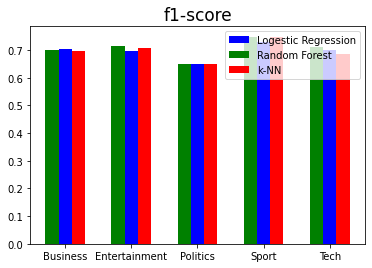

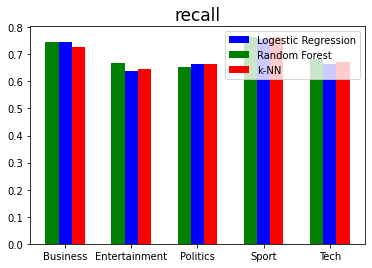

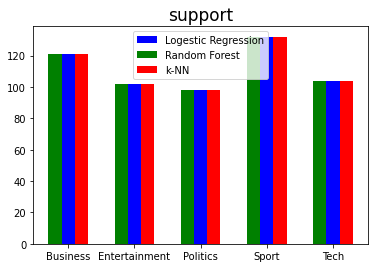

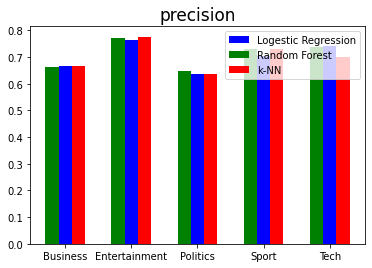

In [19]:
plot_data('f1-score')
plot_data('recall')
plot_data('support')
plot_data('precision')

In [20]:
from sklearn.metrics import confusion_matrix
import numpy as np
def get_accuracy(y_test,y_predict):
  # Get the confusion matrix
  cm = confusion_matrix(y_test, y_predict)

  # We will store the results in a dictionary for easy access later
  per_class_accuracies = {}

  # Calculate the accuracy for each one of our classes
  for idx, cls in enumerate([0,1,2,3,4]):
    # True negatives are all the samples that are not our current GT class (not the current row) 
    # and were not predicted as the current class (not the current column)
    true_negatives = np.sum(np.delete(np.delete(cm, idx, axis=0), idx, axis=1))
    
    # True positives are all the samples of our current GT class that were predicted as such
    true_positives = cm[idx, idx]
    
    # The accuracy for the current class is ratio between correct predictions to all predictions
    per_class_accuracies[cls] = ((true_positives + true_negatives) / np.sum(cm))*100
  return per_class_accuracies


In [21]:
def plot_accuracy():
  rf_list=get_accuracy(Y_test,y_pred_test)
  lr_list=get_accuracy(Y_test,predictions)
  knn_list=get_accuracy(Y_test,pred)
  # data
  rf_dic = {'Business':rf_list[0], 'Entertainment':rf_list[1], 'Politics':rf_list[2], 'Sport':rf_list[3], 'Tech': rf_list[4]}
  lr_dic = {'Business':lr_list[0], 'Entertainment':lr_list[1], 'Politics':lr_list[2], 'Sport':lr_list[3], 'Tech': lr_list[4]}
  knn_dic = {'Business':knn_list[0], 'Entertainment':knn_list[1], 'Politics':knn_list[2], 'Sport':knn_list[3], 'Tech': knn_list[4]}

  X = np.arange(len(rf_dic))
  ax = plt.subplot(111)
  ax.bar(X, rf_dic.values(), width=0.2, color='b', align='center')
  ax.bar(X-0.2, lr_dic.values(), width=0.2, color='g', align='center')
  ax.bar(X+0.2, knn_dic.values(), width=0.2, color='r', align='center')
  ax.legend(('Logestic Regression','Random Forest','k-NN'))
  plt.xticks(X, rf_dic.keys())
  plt.title("accuracy", fontsize=17)
  plt.show()

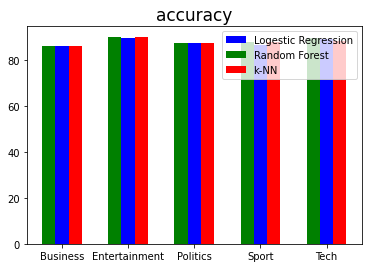

In [22]:
plot_accuracy()